In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
df = pd.read_excel('datos_ideam/resultados_concatenados.xlsx')
df.head()


,Fecha,PUERTO INIRIDA - AUT [31095030],MODULOS - AUT [35225030],AEROPUERTO YOPAL - AUT [35215020],POTRERITO AUT [35160010],TOQUILLA - AUT [35195060],LA LIBERTAD - AUT [35025110],AEROPUERTO VANGUARDIA [35035020],AEROPUERTO PUERTO CARRENO [38015030],TAMARA - AUT [35235050],...,PAEZ,TAURAMENA,CARIMAGUA - AUT [33035010],LA REVENTONERA [35097090],SAN SALVADOR - AUT [3602700101],VUELTA MALA [35260050],LA PRIMAVERA [3526500201],HUERTA LA GRANDE [35095110],EL PARAMO - AUT [24030680],SARAVENA - AUT [37045010]
0,1924-10-01 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,13.9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1924-10-02 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,34.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1924-10-03 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1924-10-04 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,5.6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1924-10-05 07:00:00,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Asegurarse de que la columna 'Fecha' es de tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Establecer la columna 'Fecha' como el índice del DataFrame
df.set_index('Fecha', inplace=True)

# Filtrar por el rango de fechas y crear una copia explícita para evitar el warning
df_filtrado = df.loc['1981-01-01':'2024-12-31'].copy()

# Reemplazar ceros con NaN antes de sumar. Si una estación tiene un valor 0,
# lo consideramos como "sin dato" para que la suma lo ignore.
# Si el valor 0 es un dato real, puedes comentar o eliminar esta línea.
numeric_cols = df_filtrado.select_dtypes(include=np.number).columns
df_filtrado[numeric_cols] = df_filtrado[numeric_cols].replace(0, np.nan)

# Usar resample('M') para agrupar por mes.
# .sum() ahora sumará los valores, pero si para un mes completo no hay datos
# en una columna, el resultado será NaN (vacío), no 0.
# min_count=1 asegura que la suma solo se realice si hay al menos un dato no-nulo.
df_mensual = df_filtrado.resample('M').sum(min_count=1)

# Resetear el índice para que la fecha vuelva a ser una columna
df_mensual = df_mensual.reset_index()

# Renombrar la columna de fecha a 'Periodo' para mayor claridad
df_mensual = df_mensual.rename(columns={'Fecha': 'Periodo'})

# Formatear la columna 'Periodo' a un string con el formato 'YYYY-MM'
df_mensual['Periodo'] = df_mensual['Periodo'].dt.strftime('%Y-%m')
# Mostrar las primeras filas del resultado final.
# Ahora los meses sin datos para una estación mostrarán 'NaN'.
df_mensual.head()

,Periodo,PUERTO INIRIDA - AUT [31095030],MODULOS - AUT [35225030],AEROPUERTO YOPAL - AUT [35215020],POTRERITO AUT [35160010],TOQUILLA - AUT [35195060],LA LIBERTAD - AUT [35025110],AEROPUERTO VANGUARDIA [35035020],AEROPUERTO PUERTO CARRENO [38015030],TAMARA - AUT [35235050],...,PAEZ,TAURAMENA,CARIMAGUA - AUT [33035010],LA REVENTONERA [35097090],SAN SALVADOR - AUT [3602700101],VUELTA MALA [35260050],LA PRIMAVERA [3526500201],HUERTA LA GRANDE [35095110],EL PARAMO - AUT [24030680],SARAVENA - AUT [37045010]
0,1981-01,16.0,NaN,NaN,2.9,6.0,2.8,41.5,6.3,NaN,...,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.3,0.2
1,1981-02,NaN,61.9,261.7,24.5,21.0,148.2,224.4,56.9,NaN,...,152.9,227.1,53.6,NaN,NaN,NaN,NaN,NaN,66.3,341.6
2,1981-03,137.2,87.4,126.9,15.1,64.0,98.4,117.5,53.8,NaN,...,45.9,148.7,49.2,NaN,NaN,NaN,NaN,NaN,65.3,117.9
3,1981-04,148.3,512.2,309.9,188.0,81.0,431.9,415.6,372.8,NaN,...,337.3,684.5,298.9,NaN,NaN,NaN,NaN,NaN,254.9,561.5
4,1981-05,99.2,368.3,541.9,156.3,174.0,706.5,885.6,371.9,NaN,...,288.5,486.4,224.3,NaN,NaN,NaN,NaN,NaN,259.1,418.0


In [33]:
# Opcional: Guardar el resultado en un nuevo archivo
df_mensual.to_excel('datos_ideam/precipitacion_mensual.xlsx', index=False)

In [31]:
# Definir el rango de filas a considerar (enero 1981 a diciembre 2024)
df_mensual_filtrado = df_mensual[(df_mensual['Periodo'] >= '1981-01') & (df_mensual['Periodo'] <= '2024-12')]

# Calcular el umbral mínimo de datos requeridos (40% del total de meses en el periodo)
total_meses = len(df_mensual_filtrado)
umbral = int(np.ceil(total_meses * 0.40))

# Contar estaciones antes del filtro (excluyendo la columna 'Periodo')
estaciones_antes = df_mensual.shape[1] - 1

# Seleccionar columnas que cumplen con el umbral de datos no nulos
columnas_validas = ['Periodo'] + [
    col for col in df_mensual.columns if col != 'Periodo' and df_mensual_filtrado[col].count() >= umbral
]

# Filtrar el DataFrame
df_mensual_filtrado_estaciones = df_mensual[columnas_validas]

# Contar estaciones después del filtro
estaciones_despues = len(columnas_validas) - 1
estaciones_eliminadas = estaciones_antes - estaciones_despues

print(f"Estaciones antes del filtro: {estaciones_antes}")
print(f"Estaciones después del filtro: {estaciones_despues}")
print(f"Estaciones eliminadas: {estaciones_eliminadas}")

Estaciones antes del filtro: 333
Estaciones después del filtro: 230
Estaciones eliminadas: 103


In [32]:
df_mensual_filtrado_estaciones.head()

,Periodo,PUERTO INIRIDA - AUT [31095030],MODULOS - AUT [35225030],AEROPUERTO YOPAL - AUT [35215020],POTRERITO AUT [35160010],TOQUILLA - AUT [35195060],LA LIBERTAD - AUT [35025110],AEROPUERTO VANGUARDIA [35035020],AEROPUERTO PUERTO CARRENO [38015030],TAMARA - AUT [35235050],...,TRINIDAD - AUT [35235040],SAN JOSE DEL GUAVIARE [32105080],PAEZ,TAURAMENA,CARIMAGUA - AUT [33035010],LA REVENTONERA [35097090],VUELTA MALA [35260050],HUERTA LA GRANDE [35095110],EL PARAMO - AUT [24030680],SARAVENA - AUT [37045010]
0,1981-01,16.0,NaN,NaN,2.9,6.0,2.8,41.5,6.3,NaN,...,NaN,NaN,11.0,NaN,NaN,NaN,NaN,NaN,6.3,0.2
1,1981-02,NaN,61.9,261.7,24.5,21.0,148.2,224.4,56.9,NaN,...,NaN,NaN,152.9,227.1,53.6,NaN,NaN,NaN,66.3,341.6
2,1981-03,137.2,87.4,126.9,15.1,64.0,98.4,117.5,53.8,NaN,...,NaN,NaN,45.9,148.7,49.2,NaN,NaN,NaN,65.3,117.9
3,1981-04,148.3,512.2,309.9,188.0,81.0,431.9,415.6,372.8,NaN,...,NaN,NaN,337.3,684.5,298.9,NaN,NaN,NaN,254.9,561.5
4,1981-05,99.2,368.3,541.9,156.3,174.0,706.5,885.6,371.9,NaN,...,NaN,NaN,288.5,486.4,224.3,NaN,NaN,NaN,259.1,418.0


In [34]:
df_mensual_filtrado_estaciones.to_excel('datos_analisis/precipitacion_mensual_ideam.xlsx', index=False)

In [ ]:
# Cargar el shapefile de estaciones
gdf_estaciones = gpd.read_file('area_de_estudio\shape\Estaciones_Orinoquia\Estaciones_Orinoquia.shp')

# Obtener los nombres de las estaciones del DataFrame filtrado (excluyendo la columna 'Periodo')
nombres_estaciones = df_mensual_filtrado_estaciones.columns.drop('Periodo')

# Filtrar el GeoDataFrame según los nombres de estaciones presentes en el DataFrame
gdf_filtrado = gdf_estaciones[gdf_estaciones['nombre'].isin(nombres_estaciones)]

print(gdf_filtrado.shape)
# Mostrar las primeras filas del GeoDataFrame filtrado
gdf_filtrado.head()

(231, 21)


,CODIGO,nombre,CATEGORIA,TECNOLOGIA,ESTADO,FECHA_INST,altitud,latitud,longitud,DEPARTAMEN,...,AREA_OPERA,AREA_HIDRO,ZONA_HIDRO,observacio,CORRIENTE,FECHA_SUSP,SUBZONA_HI,ENTIDAD,subred,geometry
3,31095030,PUERTO INIRIDA - AUT [31095030],AM,TEST005,ESTA001,2003/03/27,100.0,3.874417,-67.919056,94.0,...,3.0,3.0,31.0,Actualizada Tecnología y Tipo de Transmisión p...,0.0,0000/00/00,3108.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,"RED ALERTAS - AREA OPERATIVA 03,",POINT (-67.91906 3.87442)
4,35225030,MODULOS - AUT [35225030],CO,TEST005,ESTA001,2016/12/15,130.0,4.910472,-71.433056,85.0,...,3.0,3.0,35.0,Actualizado Tecnologia y Tipo de transmision p...,0.0,0000/00/00,3522.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,"Piedemonte y Altillanura Meta-Csanare-Arauca,R...",POINT (-71.43306 4.91047)
8,35215020,AEROPUERTO YOPAL - AUT [35215020],CP,TEST005,ESTA001,2005/11/17,325.0,5.320444,-72.387500,85.0,...,6.0,3.0,35.0,None,0.0,0000/00/00,3521.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,"Colombia,Piedemonte y Altillanura Meta-Csanare...",POINT (-72.3875 5.32044)
16,35160010,POTRERITO AUT [35160010],PM,TEST005,ESTA003,2016/12/31,347.0,5.477583,-72.948611,15.0,...,6.0,3.0,35.0,22/08/2022$Migracion$Se Cambia Estado por orde...,0.0,0000/00/00,3516.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,None,POINT (-72.94861 5.47758)
17,35195060,TOQUILLA - AUT [35195060],CO,TEST005,ESTA001,2016/12/15,2950.0,5.523611,-72.790972,15.0,...,6.0,3.0,35.0,None,0.0,0000/00/00,3519.0,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,None,POINT (-72.79097 5.52361)


In [43]:
# Exportar el GeoDataFrame filtrado a un nuevo archivo shapefile
gdf_filtrado.to_file('area_de_estudio/shape/Estaciones_IDEAM_Orinquia_Datos/estaciones_orinoquia_datos.shp', driver='ESRI Shapefile')

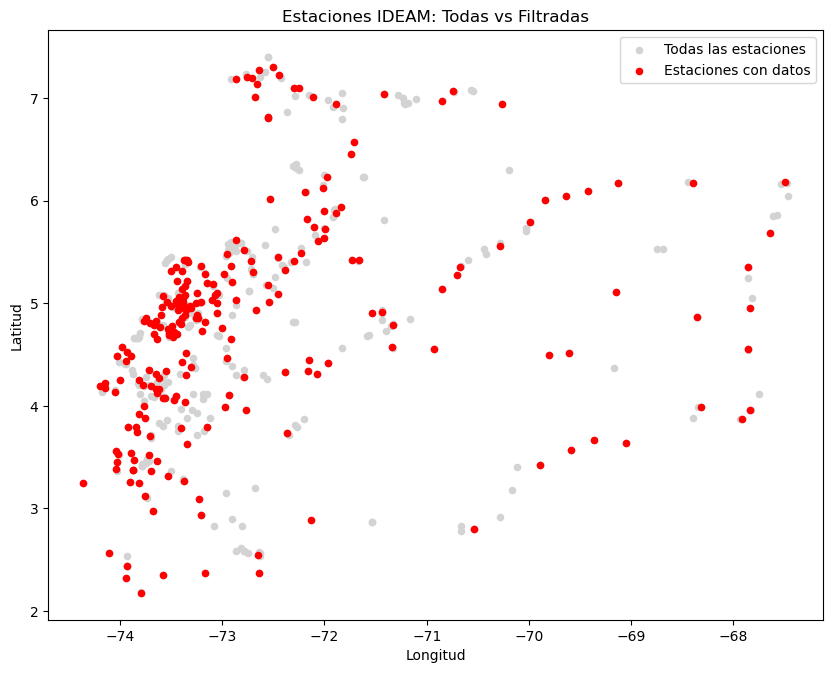

In [45]:
# Visualizar el shapefile completo y el filtrado
fig, ax = plt.subplots(figsize=(10, 10))
gdf_estaciones.plot(ax=ax, color='lightgray', markersize=20, label='Todas las estaciones')
gdf_filtrado.plot(ax=ax, color='red', markersize=20, label='Estaciones con datos')
plt.legend()
plt.title('Estaciones IDEAM: Todas vs Filtradas')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()